Name: Aqsa Younus
ERP: 18571
Assignment: Data Wrangling of Final Exam

# Objective of Creating This File

- To create a data wrangling template specifically for the dataset that I have chosen
- To explore and understand the dataset in-depth 
- To identify part would require modifications in order to assist us with our data analysis

## What Assumptions Have I made Before Starting the Assignment?

- Before starting the assignement, I have made the assumption that I am aware of the business requirements of the dataset, just like how we approch everything in class. As per your lectures, the importance of understanding what the business requirements are is highly essential and without that, it becomes difficult for data analysts to understand what columns are vital and which ones are not. 

# Step 1

- Add all imports that may be needed for the wrangling process

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import csv
from sklearn.impute import SimpleImputer
import warnings
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import random as r
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 2

- Upload dataset
- Check for missing values
- changing types of the columns

In [17]:
#uploading csv file
df = pd.read_csv (r'C:\Users\Hp\Downloads\online_shoppers_intention.csv')
#checking what kind of columns are we dealing with
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
#data description
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [20]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [21]:
#checking shape
df.shape

(12330, 18)

<AxesSubplot:>

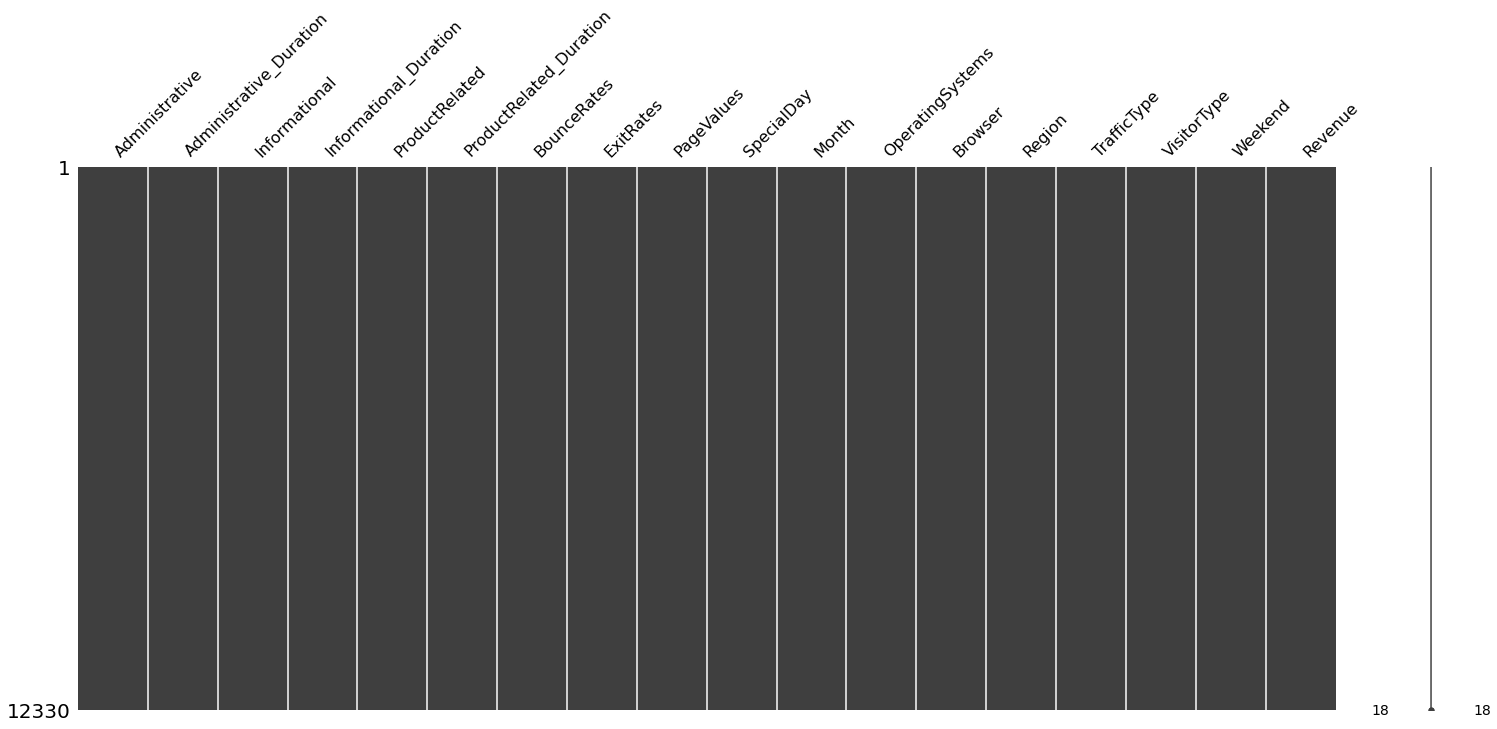

In [22]:
#checking where the data is missing through matrix 
msno.matrix(df)

- Despite not having any null values, there are 0 entires, however they are of signficance, which is why we are not removing them as of now
- Furthmore, some of the columns need to change in data type as well so we will look into that too

In [16]:
# Integer type to object type
df['Browser'] = df['Browser'].astype('str')
df['Region'] = df['Region'].astype('str')
df['TrafficType'] = df['TrafficType'].astype('str')
# Boolean type to object type 
df['Revenue'] = df['Revenue'].astype('str')
df['Weekend'] = df['Weekend'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

# Step 3
- Now since we have dealt with the issues of missing values and changed dataset types, we will create a heatmap to check the correlation in order to understand which columns are of significance and which are not. In the data wrangling assignment, my mistake was that I created a heat map after the analysis. I think it is ideal to create it before moving further

<AxesSubplot:>

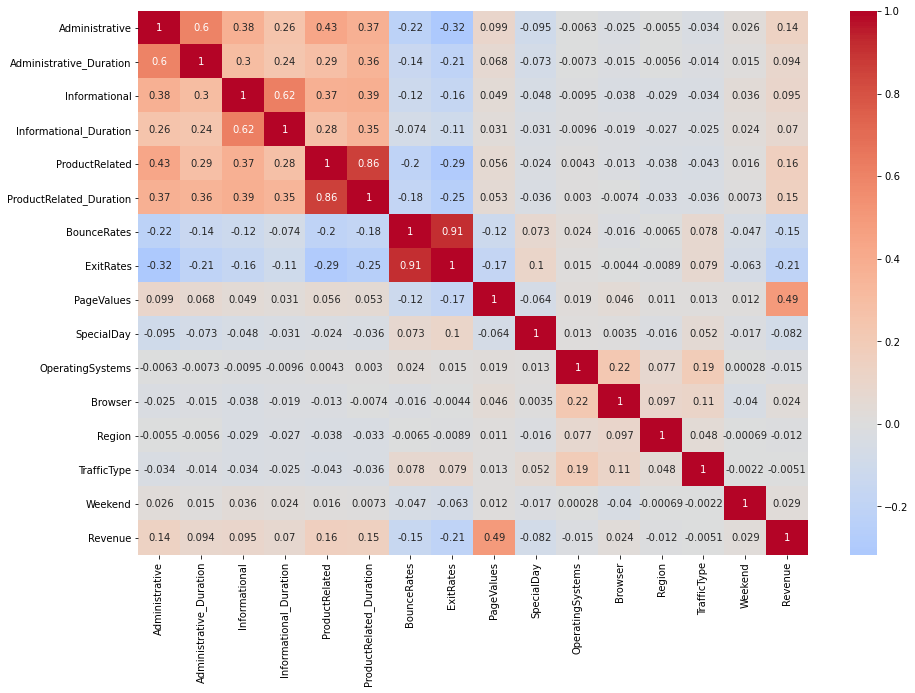

In [23]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

In [24]:
#dropping columns that will not assist us with data analysis
df2 = df.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

- It should be noted that we have created a copy of the df so that we do not impact the orginal data with our edits. 

# Step 4

- We will now understand the data further this includes checking for unique values/count of values, e.t.c. It will give us insights on how to create analysis for the dataset


In [29]:
#for browser
df2['Browser'].value_counts()


2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [30]:
df2['Browser'].nunique()


13

In [31]:
#vistor type
df2['VisitorType'].value_counts()


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [32]:
df2['VisitorType'].nunique()


3

In [33]:
#OS 
df2['OperatingSystems'].value_counts()


2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [34]:
df2['OperatingSystems'].nunique()


8

In [35]:
#month 
df2['Month'].value_counts()


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [36]:
df2['Month'].nunique()


10

In [37]:
#Weekend  Weekend
df2['Weekend'].value_counts()


False    9462
True     2868
Name: Weekend, dtype: int64

In [38]:
df2['Weekend'].nunique()


2

In [39]:
#Revenue  Revenue
df2['Revenue'].value_counts()


False    10422
True      1908
Name: Revenue, dtype: int64

In [40]:
df2['Revenue'].nunique()

2

- I have checked for for the count of values and null values just in case. This is the categorical data. We had to ensure that there are not any form of errors and incorrect inputs and so far there are none. A key thing to note is that months Jan and Apr are missing in the data, so it is something that should be addressed to the administration 

# Step 3: Anomaly Detection 

- this is an important part of our analysis this will give us an insight on how to data is working, what aspects should one look into, are the anomalies good or bad?

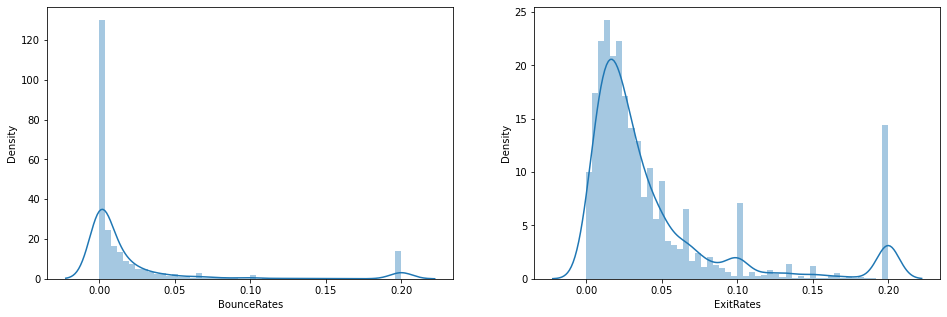

In [46]:
#looking at the disrubtion curve for bounce and exit rates
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['BounceRates'])
plt.subplot(1,2,2)
sns.distplot(df2['ExitRates'])
plt.show()

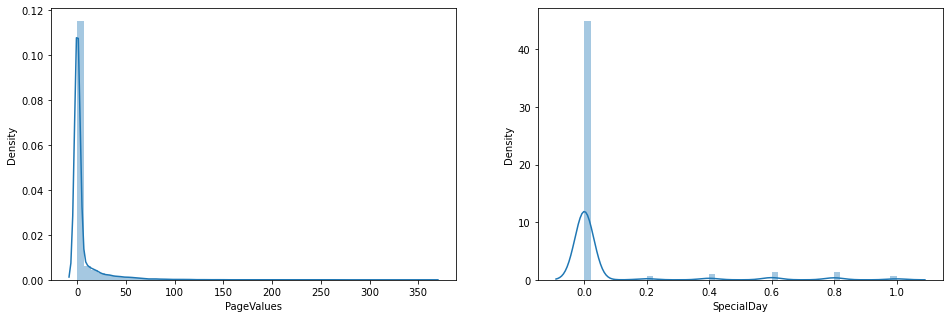

In [47]:
#looking at the disrubtion curve for pagevalue and special days
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['PageValues'])
plt.subplot(1,2,2)
sns.distplot(df2['SpecialDay'])
plt.show()

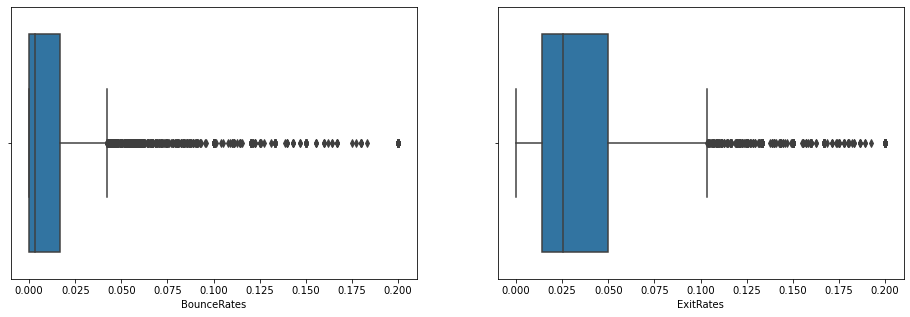

In [48]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df2['BounceRates'])
plt.subplot(1,2,2)
sns.boxplot(df2['ExitRates'])
plt.show()

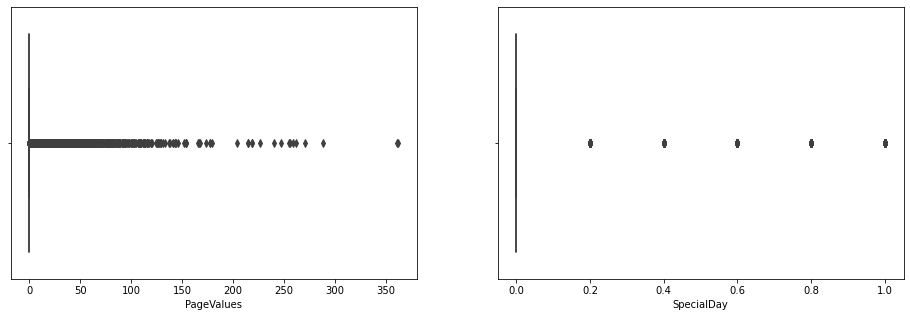

In [49]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df2['PageValues'])
plt.subplot(1,2,2)
sns.boxplot(df2['SpecialDay'])
plt.show()

- Though it is good that the page value has a lot of high values. However, we will investigate further to see why there are so many max values and why the box plot has an odd shape

In [50]:
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

- we notice that due to the maximum being a very large number, the box plot was not being plotted the right way, however, since the outliers here are beneficial for this data, we will not remove it. We will just create a copy of the data and then remove the outlier to see insights of the rest of the data in the Total column.

In [56]:
# copy the data
df_copy = df2.copy()
#removing the outlier
df_copy = df2[df2['PageValues'] < 100]  

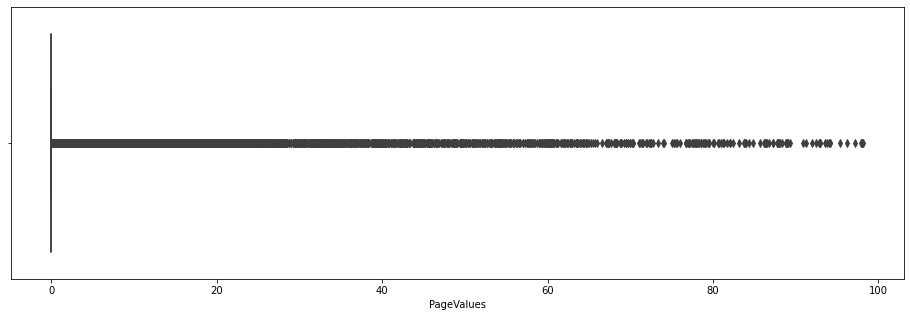

In [57]:
#replotting the box plot
plt.figure(figsize=(16,5))
#plt.subplot(1,2,1)
sns.boxplot(df_copy['PageValues'])
plt.show()

- It seems like the whole column is anomlous, we will leave it as is as aforemetnioned page value is for the benefit of the company

### This concludes our data wrangling, the insights we have gathered so far are

- KPIS and Diminsions
- Correlation between columns
- Anomalies in the data
- values present in the data

Further insights will be give via tablaeu

In [58]:
df2.to_csv('Cleaned_Data.csv', index=False)